# Import Libraries and crawled data

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('tables.csv').drop(columns=['Unnamed: 0'])

In [3]:
df

,team_title,team_id,game_count,points,uefa_status,team_performance
0,Manchester City,281,38,93,True,2.447368
1,Liverpool FC,31,38,92,True,2.421053
2,Chelsea FC,631,38,74,True,1.947368
3,Tottenham Hotspur,148,38,71,False,1.868421
4,Arsenal FC,11,38,69,False,1.815789
...,...,...,...,...,...,...
89,RCD Mallorca,237,38,39,False,1.026316
90,Cádiz CF,2687,38,39,False,1.026316
91,Granada CF,16795,38,38,False,1.000000
92,Levante UD,3368,38,35,False,0.921053


# EDA

In [4]:
df.describe()

,team_id,game_count,points,team_performance
count,94.000000,94.000000,94.000000,94.000000
mean,1967.095745,36.212766,49.617021,1.370962
std,6520.437973,4.295214,17.454153,0.458286
min,5.000000,26.000000,13.000000,0.500000
25%,370.750000,38.000000,37.250000,1.026316
50%,682.000000,38.000000,46.500000,1.302632
75%,1129.750000,38.000000,62.000000,1.677632
max,60949.000000,38.000000,93.000000,2.500000


In [5]:
print('Number of UEFA member clubs:', len(df[df.uefa_status == True]))
print('Number of other clubs:', len(df[df.uefa_status == False]))

Number of UEFA member clubs: 15
Number of other clubs: 79


Because of different club number of lgeaues, metric(team_performance) has calculated as season points divided by league club number

In [6]:
print('Mean of performance score of UEFA member clubs:', df[df.uefa_status == True].team_performance.mean())
print('Mean of performance score of other clubs:', df[df.uefa_status == False].team_performance.mean())

Mean of performance score of UEFA member clubs: 1.9578947368421054
Mean of performance score of other clubs: 1.259519294829088


# Split teams and create sample data

In [7]:
group1 = df[df.uefa_status == True].team_performance
group2 = df[df.uefa_status == False].team_performance

# Perform two-sample t-test with different sample sizes

In [8]:
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 7.1376437028221655
p-value: 4.121061874817815e-07


In [9]:
print('As', (1-p_value)*100, 'percent, performance of two teams are different.')

As 99.99995878938125 percent, performance of two teams are different.


# Draw plot of normal distribution

In [10]:
# create x data to compute probiblity
xmin , xmax = min(group1.min(), group2.min()), max(group1.max(), group2.max(), 3)
x = np.linspace(xmin, xmax, 100)

Text(0.5, 0, 'As 99.99995878938125 percent, performance of two teams are different.')

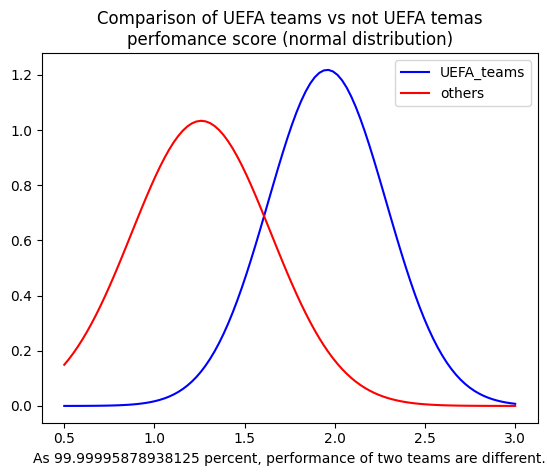

In [11]:
fig, ax = plt.subplots()
p1 = stats.norm.pdf(x, np.mean(group1), np.std(group1))
p2 = stats.norm.pdf(x, np.mean(group2), np.std(group2))
ax.plot(x, p1, 'b', label = 'UEFA_teams')
ax.plot(x, p2, 'r', label = 'others')
ax.set_title('Comparison of UEFA teams vs not UEFA temas\nperfomance score (normal distribution)')
ax.legend()
ax.set_xlabel('As 99.99995878938125 percent, performance of two teams are different.')

In [12]:
fig.savefig('hypothesis_test_2.png')